# Feature engineering

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-necessary-packages" data-toc-modified-id="Import-necessary-packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import necessary packages</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Check-for-multicollinearity" data-toc-modified-id="Check-for-multicollinearity-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Check for multicollinearity</a></span></li><li><span><a href="#Feature-scaling" data-toc-modified-id="Feature-scaling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Feature scaling</a></span></li><li><span><a href="#Features-importance-using-random-forest-model" data-toc-modified-id="Features-importance-using-random-forest-model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Features importance using random forest model</a></span></li><li><span><a href="#Save-data" data-toc-modified-id="Save-data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Save data</a></span></li></ul></div>

## Import necessary packages

In [1]:
#import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
#to ensure clean outputs ignore the warning messages 
import warnings
warnings.filterwarnings('ignore')

## Load the data

In [2]:
# Read the datafile
df = pd.read_csv('../processed_data/02_FE_CHD_data.csv')
df.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df.shape

(3658, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3658 entries, 0 to 3657
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           3658 non-null   int64  
 1   age              3658 non-null   int64  
 2   education        3658 non-null   float64
 3   currentSmoker    3658 non-null   int64  
 4   cigsPerDay       3658 non-null   float64
 5   BPMeds           3658 non-null   float64
 6   prevalentStroke  3658 non-null   int64  
 7   prevalentHyp     3658 non-null   int64  
 8   diabetes         3658 non-null   int64  
 9   totChol          3658 non-null   float64
 10  sysBP            3658 non-null   float64
 11  diaBP            3658 non-null   float64
 12  BMI              3658 non-null   float64
 13  heartRate        3658 non-null   float64
 14  glucose          3658 non-null   float64
 15  TenYearCHD       3658 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 457.4 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,3658.0,0.443685,0.496886,0.00,0.00,0.00,1.0000,1.0
age,3658.0,49.551941,8.562029,32.00,42.00,49.00,56.0000,70.0
education,3658.0,1.980317,1.022656,1.00,1.00,2.00,3.0000,4.0
currentSmoker,3658.0,0.489065,0.499949,0.00,0.00,0.00,1.0000,1.0
cigsPerDay,3658.0,9.025424,11.921590,0.00,0.00,0.00,20.0000,70.0
BPMeds,3658.0,0.030344,0.171557,0.00,0.00,0.00,0.0000,1.0
prevalentStroke,3658.0,0.005741,0.075561,0.00,0.00,0.00,0.0000,1.0
prevalentHyp,3658.0,0.311646,0.463229,0.00,0.00,0.00,1.0000,1.0
diabetes,3658.0,0.027064,0.162292,0.00,0.00,0.00,0.0000,1.0
totChol,3658.0,236.847731,44.097681,113.00,206.00,234.00,263.0000,600.0


In [6]:
#convert numerical data type 'age' into catergorical data as age group
df['age_group'] = pd.cut(df['age'], bins=[1, 30, 40, 50, 60, np.inf], 
                          labels=[1,2,3,4,5])
df.drop(['age'], axis=1, inplace=True)
df.head()

,gender,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_group
0,1,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,2
1,0,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,3
2,1,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,3
3,0,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,5
4,0,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,3


## Check for multicollinearity

When the independent variables show a strong correlation among themselves, there is probability of multicollinearity. Since some of the independent variables show strong corrleation among themselves, I am computing Variance Inflation Factor(VIF) to check multicollinearity,. 

In [7]:
# defining the independent variables
X = df.drop('TenYearCHD', axis=1)

# add constant to the independent variables
X = sm.add_constant(X)

# defining the dependent variables
y = df[['TenYearCHD']]

In [8]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

            feature         VIF
0             const  176.094496
1            gender    1.203755
2         education    1.053926
3     currentSmoker    2.583798
4        cigsPerDay    2.730844
5            BPMeds    1.111055
6   prevalentStroke    1.017441
7      prevalentHyp    2.048857
8          diabetes    1.615771
9           totChol    1.111191
10            sysBP    3.730424
11            diaBP    2.989243
12              BMI    1.239636
13        heartRate    1.093428
14          glucose    1.637372
15        age_group    1.317082


In [9]:
# building the model and fitting the data
log_reg = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.378641
         Iterations 7


In [10]:
# printing the summary table
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3658
Model:                          Logit   Df Residuals:                     3642
Method:                           MLE   Df Model:                           15
Date:                Mon, 17 May 2021   Pseudo R-squ.:                  0.1125
Time:                        21:58:31   Log-Likelihood:                -1385.1
converged:                       True   LL-Null:                       -1560.6
Covariance Type:            nonrobust   LLR p-value:                 1.270e-65
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -6.9886      0.663    -10.540      0.000      -8.288      -5.689
gender              0.5693      0.109      5.240      0.000       0.356       0.782
education          -0.0550      

## Feature scaling

In [11]:
#scale the data
R_scaler = RobustScaler()
X_scaler = R_scaler.fit_transform(df.drop('TenYearCHD', axis=1))
X=pd.DataFrame(X_scaler, columns=df.drop('TenYearCHD', axis=1).columns)
X = sm.add_constant(X)
X.head()

,const,gender,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,age_group
0,1.0,1.0,1.0,0.0,0.00,0.0,0.0,0.0,0.0,-0.684211,-0.818605,-0.800000,0.320726,0.357143,-0.0625,-1.0
1,1.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.280702,-0.260465,-0.066667,0.675744,1.428571,-0.1250,0.0
2,1.0,1.0,-0.5,1.0,1.00,0.0,0.0,0.0,0.0,0.192982,-0.018605,-0.133333,-0.008069,0.000000,-0.5000,0.0
3,1.0,0.0,0.5,1.0,1.50,0.0,0.0,1.0,0.0,-0.157895,0.818605,0.866667,0.645487,-0.714286,1.5625,2.0
4,1.0,0.0,0.5,1.0,1.15,0.0,0.0,0.0,0.0,0.894737,0.074419,0.133333,-0.459909,0.714286,0.4375,0.0


In [12]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

            Feature       VIF
0             const  3.496098
1            gender  1.203755
2         education  1.053926
3     currentSmoker  2.583798
4        cigsPerDay  2.730844
5            BPMeds  1.111055
6   prevalentStroke  1.017441
7      prevalentHyp  2.048857
8          diabetes  1.615771
9           totChol  1.111191
10            sysBP  3.730424
11            diaBP  2.989243
12              BMI  1.239636
13        heartRate  1.093428
14          glucose  1.637372
15        age_group  1.317082


As a rule of thumb, when there are variables with VIF score higher than 5, then there is collinearity. In our analysis, VIF of none of the independent variables is higher than 10 suggesting no occurence of collinearity. 

In [13]:
# building the model and fitting the data
log_reg = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.378641
         Iterations 7


In [14]:
# printing the summary table
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3658
Model:                          Logit   Df Residuals:                     3642
Method:                           MLE   Df Model:                           15
Date:                Mon, 17 May 2021   Pseudo R-squ.:                  0.1125
Time:                        21:58:31   Log-Likelihood:                -1385.1
converged:                       True   LL-Null:                       -1560.6
Covariance Type:            nonrobust   LLR p-value:                 1.270e-65
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.8192      0.111    -25.312      0.000      -3.038      -2.601
gender              0.5693      0.109      5.240      0.000       0.356       0.782
education          -0.1100      

In [15]:
#compute the log odds
import math
logodds = []
for coef in log_reg.params.values:
    logodd = math.exp(abs(coef))
    logodds.append(logodd)   

In [16]:
#extract p value
p_vals = []
for feat_index in range (0, len(log_reg.params)):
    p_val = log_reg.pvalues[feat_index]
    p_vals.append(p_val)

In [17]:
#generate dataframe of different features with coefficients, log odds and p values
logreg_coef = pd.concat([pd.DataFrame(log_reg.params.index),pd.DataFrame(log_reg.params.values), pd.DataFrame(logodds), pd.DataFrame(p_vals)],axis=1)
logreg_coef.columns = ['Features','coef', 'log_odds', 'p_value']

#subset the dataset to extract only significant features after droping const
sig_features = logreg_coef[logreg_coef.p_value<0.05].drop([0]).sort_values(by=["log_odds"], ascending=False) 
sig_features

,Features,coef,log_odds,p_value
1,gender,0.569335,1.767091,1.601968e-07
15,age_group,0.529160,1.697506,3.701627e-18
10,sysBP,0.454415,1.575252,8.255130e-06
4,cigsPerDay,0.340672,1.405892,6.285215e-03
9,totChol,0.142875,1.153585,2.523381e-02
14,glucose,0.113439,1.120124,1.493418e-03


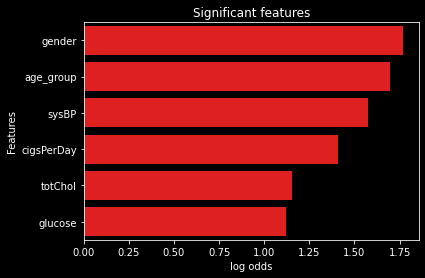

In [18]:
#Bar plot of log odds of significant features
plt.style.use("dark_background")
sns.barplot(x='log_odds', y='Features', data = sig_features, color='red')
plt.xlabel('log odds')
plt.title('Significant features')
plt.show()

## Features importance using random forest model

In [19]:
X = df.drop(columns=['TenYearCHD'])
y = df.TenYearCHD
#scale the features
R_scaler = RobustScaler()
X_scaler = R_scaler.fit_transform(X)
X=pd.DataFrame(X_scaler, columns=X.columns)

In [20]:
## Import the random forest model.
from sklearn.ensemble import RandomForestClassifier
## This line instantiates the model.
rf = RandomForestClassifier()
## Fit the model on your training data.
rf.fit(X_scaler, y)

RandomForestClassifier()

In [21]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                        index = X.columns,
                        columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
sysBP,0.147647
BMI,0.141469
totChol,0.131687
glucose,0.126556
diaBP,0.125252
heartRate,0.103906
age_group,0.055277
cigsPerDay,0.055155
education,0.040952
gender,0.022740


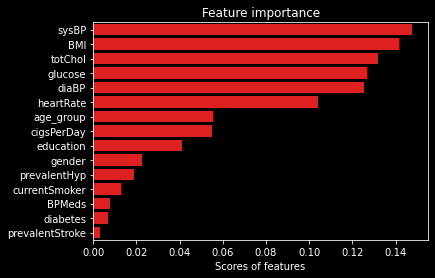

In [22]:
#Bar plot of feature importance
sns.barplot(x=feature_importances.importance, y=feature_importances.index,color='red')
plt.xlabel('Scores of features')
plt.title('Feature importance')
plt.show()

In [23]:
#create new dataframe
new_df = pd.concat([X,pd.DataFrame(y)], axis=1)
new_df.head()

,gender,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,age_group,TenYearCHD
0,1.0,1.0,0.0,0.00,0.0,0.0,0.0,0.0,-0.684211,-0.818605,-0.800000,0.320726,0.357143,-0.0625,-1.0,0
1,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.280702,-0.260465,-0.066667,0.675744,1.428571,-0.1250,0.0,0
2,1.0,-0.5,1.0,1.00,0.0,0.0,0.0,0.0,0.192982,-0.018605,-0.133333,-0.008069,0.000000,-0.5000,0.0,0
3,0.0,0.5,1.0,1.50,0.0,0.0,1.0,0.0,-0.157895,0.818605,0.866667,0.645487,-0.714286,1.5625,2.0,1
4,0.0,0.5,1.0,1.15,0.0,0.0,0.0,0.0,0.894737,0.074419,0.133333,-0.459909,0.714286,0.4375,0.0,0


## Save data

In [24]:
#save the new dataframe
new_df.to_csv(r"../processed_data/03_FE_CHD_data.csv",  index = False, header=True)